## Varianz und Standardabweichung
----------------------------------------

In [84]:
# Importiere matplotlib

import matplotlib.pyplot as plt

# Importiere numpy

import numpy as np

# Importiere pandas

import pandas as pd

# import random 

from random import sample

import random

import scipy

from scipy import stats

from scipy.stats import norm,gaussian_kde



Die **Varianz** ist die Summe der quadrierten Abweichungen vom Mittelwert. Die Varianz für Populationsdaten wird mit $\sigma^2$ bezeichnet (gelesen als Sigma-Quadrat), und die für Stichprobendaten berechnete Varianz wird mit $s^2$ bezeichnet. <br> <br> $$ \sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{N} $$  <br> <br> und  <br> <br> $$ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1} $$ <br> <br> wobei $\sigma^2$ die Varianz der Grundgesamtheit und $s^2$ die Stichprobenvarianz ist. Die Größe $x_i-\mu$ oder $x_i-\bar{x}$ in den obigen Formeln wird als die Abweichung des $x_i$-Wertes $(x_1,x_2, \dots ,x_n)$ vom Mittelwert bezeichnet (Mann 2012). <br> <br> Die <a href="https://en.wikipedia.org/wiki/Standard_deviation">Standardabweichung</a> ist das gebräuchlichste Maß für die Streuung. Der Wert der Standardabweichung gibt an, wie eng die Werte eines Datensatzes um den Mittelwert herum gestreut sind. Im Allgemeinen zeigt ein niedriger Wert der Standardabweichung für einen Datensatz an, dass die Werte dieses Datensatzes über einen relativ kleineren Bereich um den Mittelwert herum verteilt sind. Im Gegensatz dazu zeigt ein größerer Wert der Standardabweichung für einen Datensatz an, dass die Werte dieses Datensatzes über einen relativ größeren Bereich um den Mittelwert herum gestreut sind (Mann 2012). <br> <br> 
![Alt-Text](standarddev.png) <br> <br>

Die Standardabweichung erhält man durch Ziehen der Quadratwurzel aus der **Varianz**. Folglich wird die für Grundgesamtheitsdaten berechnete Standardabweichung mit $\sigma$ und die für Stichprobendaten berechnete Standardabweichung mit $s$ bezeichnet. <br> <br> $$ \sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{N}} $$ <br> <br> und <br> <br> $$ s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}} $$ <br> <br> wobei $\sigma$ die Standardabweichung der Grundgesamtheit und $s$ die Standardabweichung der Stichprobe ist. <br> <br> <br> <br> Als Übung berechnen wir für einige numerische Variablen, die im `students_quant`-Datensatz von Interesse sind, den Mittelwert, den Median, die Varianz und die Standardabweichung und stellen sie in einem schönen Format dar.

In [2]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
df = pd.read_csv('students.csv', index_col=0)

# Lese die ersten 10 Einträge für name,age,nc.score,height und weight in listen ein
name_df=df['name'][:10]
age_df=df['age'][:10]
nc_score_df=df['nc.score'][:10]
height_df=df['height'][:10]
weight_df=df['weight'][:10]

# Erzeuge neues Dataframe students_quant
students_quant = pd.DataFrame(list(zip(name_df,age_df,nc_score_df,height_df,weight_df)), columns = ['Name','Age','Nc.Score','Height','Weight'])
students_quant

,Name,Age,Nc.Score,Height,Weight
0,"Gonzales, Christina",19,1.91,160,64.8
1,"Lozano, T'Hani",19,1.56,172,73.0
2,"Williams, Hanh",22,1.24,168,70.6
3,"Nem, Denzel",19,1.37,183,79.7
4,"Powell, Heather",21,1.46,175,71.4
5,"Perez, Jadrian",19,1.34,189,85.8
6,"Clardy, Anita",21,1.11,156,65.9
7,"Allen, Rebecca Marie",21,2.03,167,65.7
8,"Tracy, Robert",18,1.29,195,94.4
9,"Nimmons, Laura",18,1.19,165,66.0


In [3]:
mean_students_quant=students_quant.mean()
mean_students_quant

C:\Users\zak\AppData\Local\Temp\ipykernel_16180\3141023193.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_students_quant=students_quant.mean()


Age          19.70
Nc.Score      1.45
Height      173.00
Weight       73.73
dtype: float64

In [4]:
median_students_quant=students_quant.median()
median_students_quant

C:\Users\zak\AppData\Local\Temp\ipykernel_16180\3709849270.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_students_quant=students_quant.median()


Age          19.000
Nc.Score      1.355
Height      170.000
Weight       71.000
dtype: float64

In [5]:
var_students_quant=students_quant.var()
var_students_quant

C:\Users\zak\AppData\Local\Temp\ipykernel_16180\4201114685.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_students_quant=students_quant.var()


Age           2.011111
Nc.Score      0.092400
Height      158.666667
Weight       98.846778
dtype: float64

In [6]:
std_students_quant=students_quant.std()
std_students_quant

C:\Users\zak\AppData\Local\Temp\ipykernel_16180\2105206391.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_students_quant=students_quant.std()


Age          1.418136
Nc.Score     0.303974
Height      12.596296
Weight       9.942172
dtype: float64

In [7]:
id_col=['age','nc_score','height','weight']
students_quant_stats = pd.DataFrame(list(zip(id_col,mean_students_quant,median_students_quant,var_students_quant,std_students_quant)), columns = [' ','Mean','Median','Var','Std'])
students_quant_stats

,,Mean,Median,Var,Std
0,age,19.70,19.000,2.011111,1.418136
1,nc_score,1.45,1.355,0.092400,0.303974
2,height,173.00,170.000,158.666667,12.596296
3,weight,73.73,71.000,98.846778,9.942172


### Verwendung der Standardabweichung
Mit Hilfe des Mittelwerts und der Standardabweichung lässt sich der Anteil oder Prozentsatz der Gesamtbeobachtungen ermitteln, die in ein bestimmtes Intervall um den Mittelwert fallen.

#### Tschebyscheff-Theorem
Das <a href="https://en.wikipedia.org/wiki/Chebyshev%27s_inequality">Tschebyscheff-Theorem</a> gibt eine untere Schranke für die Fläche unter einer Kurve zwischen zwei Punkten, die auf gegenüberliegenden Seiten des Mittelwerts und im gleichen Abstand vom Mittelwert liegen.

#### Für jede Zahl $k$, die größer als $1$ ist, liegen mindestens $1-\frac{1}{k^2}$ der Datenwerte innerhalb von $k$ Standardabweichungen vom Mittelwert.

Lassen Sie uns Python verwenden, um ein Gefühl für den Tschebyscheff-Satz zu bekommen.

In [8]:
x=np.arange(1.0,4.1,0.1)
x_werte=[]
k_werte=[]
for n in x:
    x_werte.append((round(n,2)))
    k_werte.append((1-1/(round(n,2))**2)*100)

df4 = pd.DataFrame(list(zip(x_werte,k_werte)), columns = ['x','k'])
df4

,x,k
0,1.0,0.000000
1,1.1,17.355372
2,1.2,30.555556
3,1.3,40.828402
4,1.4,48.979592
5,1.5,55.555556
6,1.6,60.937500
7,1.7,65.397924
8,1.8,69.135802
9,1.9,72.299169


Um es in Worte zu fassen: Für $k=2$ bedeutet das, dass mindestens **$75 \% $** der Datenwerte innerhalb von **2 Standardabweichungen** vom Mittelwert liegen. <br> <br> Stellen wir das Tschebyscheff-Theorem mit Python dar: 

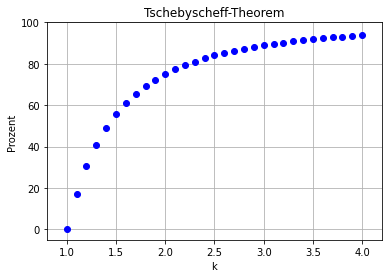

In [9]:
# Label für die x,y-Achse vergeben:
plt.title('Tschebyscheff-Theorem')
plt.ylabel('Prozent')
plt.xlabel('k')
# Einen x-y-Plot erstellen:
plt.plot(x_werte, k_werte, 'bo')

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0.8, 4.2, -5, 100])

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

# Diagramm anzeigen:
plt.show()

Das Theorem gilt sowohl für Stichproben- als auch für Grundgesamtheitsdaten. Das Tschebyscheffsche Theorem gilt für Verteilungen beliebiger Form. Es kann jedoch nur für $k > 1$ verwendet werden. Denn wenn $k=1$ ist, ist der Wert von $1-\frac{1}{k^2}$ Null, und wenn $k < 1$ ist, ist der Wert von $1-\frac{1}{k^2}$ negativ (Mann 2012). 

#### Empirische Regel
Während das Tschebyscheffsche Theorem auf jede Art von Verteilung anwendbar ist, gilt die **empirische Regel** nur für eine bestimmte Art von Verteilung, die so genannte **Gaußverteilung** oder **Normalverteilung**. Es gibt 3 Regeln: <br> <br> Bei einer Normalverteilung sind   

1.  $68 \%$ der Beobachtungen innerhalb einer Standardabweichung des Mittelwerts.
2.  $95 \%$ der Beobachtungen innerhalb von zwei Standardabweichungen des Mittelwerts.
3.  $99.7 \%$ der Beobachtungen innerhalb von drei Standardabweichungen des Mittelwerts.



Da wir inzwischen über genügend Hacking-Power verfügen, werden wir versuchen zu testen, ob die drei Regeln gültig sind. 

**(1) Erstens** werden wir die Funktion `random.normal()` in Python erforschen, um normalverteilte Daten zu erzeugen, und 

**(2) zweitens** werden wir zu unserem `students` Datensatz zurückkehren und diese Regeln an diesem Datensatz zu validieren. 
<br> <br> Die Normalverteilung gehört zur Familie der <a href="https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution">stetigen Verteilungen</a>. In Python gibt es eine Vielzahl von Wahrscheinlichkeitsverteilungen <a href="https://en.wikibooks.org/wiki/R_Programming/Probability_Distributions">(hier)</a>. Um Daten aus einer Normalverteilung zu erzeugen, kann man die Funktion `random.normal()` verwenden, die ein Zufallsvariablengenerator für die Normalverteilung ist. <br> <br> Mit der Funktion `random.sample()` können wir `n` Werte aus einer Normalverteilung mit einem gegebenen Mittelwert (Standard ist 0) und einer Standardabweichung (Standard ist 1) entnehmen: `random.normal(loc=0.0, scale=1.0)`. Lassen Sie uns das ausprobieren:

In [10]:
data = np.random.normal(loc=0.0, scale=1.0, size=200)
data=list(data)
probe = random.sample(data, 1)
print(probe)

[0.07076686456102771]


In [11]:
probe = random.sample(data, 1)
print(probe)

[1.4723433777752555]


In [12]:
probe = random.sample(data, 1)
print(probe)

[-2.696836607925604]


In [13]:
probe = random.sample(data, 1)
print(probe)

[-0.42407184685004573]


Wir sehen, dass die Funktion `random.sample()` <a href="https://en.wikipedia.org/wiki/Pseudorandom_number_generator">(Pseudo-)Zufallszahlen</a> liefert. Wir können die Funktion ziemlich einfach bitten, Hunderte oder Tausende oder noch mehr (Pseudo-)Zufallszahlen zu ziehen:

In [14]:
probe = random.sample(data, 10)
print(probe)

[-3.3543103074145764, -0.044894511100889545, 0.6565737701908195, 1.061203788376625, 0.8262403122533859, -0.8929357093725412, 0.07001848062159627, -0.5152093509687182, 0.9934724043241582, 1.1018208325094152]


In [15]:
probe = random.sample(data, 100)
print(probe)

[1.0987586966824963, -1.022577767704622, 1.6354471109187847, -1.3539961974608363, -0.5360289441459057, 1.0764812865661866, 0.6641116211116749, -0.017819259428694424, 0.6565737701908195, 0.9454749896902241, 1.3730902161384282, -0.4792370733539222, -0.604866345267324, 0.6687942164673775, -0.17320805858528118, -0.36356958094391745, 1.1923055832996075, 2.206273395637807, -1.3976987403578318, 0.8104732557949995, 0.680397552517811, 0.10851039937060447, -0.33055464777946564, 0.1277437221412448, 0.6063905949235757, -1.3929782541598095, -0.5473152580901638, 0.3753932574369657, 0.632356076755197, 1.2004404118795344, -0.05880680759884178, 0.25099923955950776, 1.7067231911775975, 0.7263187931860848, 0.6727363696428522, -0.5986762515517215, 0.7191585359920005, 0.9934724043241582, 1.1449326538677471, 2.7390688445572815, 0.43432115242084934, 0.785848786659093, -0.6817922669840062, 0.18877834833948753, -0.9872074663604228, -0.5158973367831505, -0.3372704535423384, -0.11819236070821981, 0.4885806723446

In [16]:
y_norm = np.random.normal(loc=0.0, scale=1.0, size=100000)
y_norm = list(y_norm)

Wenn wir ein Histogramm dieser Zahlen erstellen, sehen wir die namensgebende glockenförmige Verteilung.

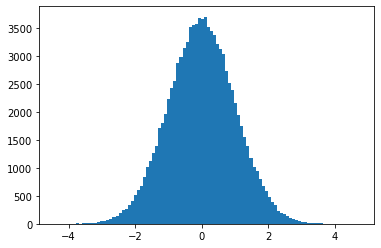

In [17]:
plt.hist(y_norm, bins = 100)
plt.show()

Wir kennen bereits den Mittelwert und die Standardabweichung der Werte in der `y_norm` Liste, da wir die Funktion `random.normal()` explizit mit `mean=0` und `sd=1` aufgerufen haben. Wir müssen also nur die Zahlen der `y_norm` Liste zählen, die größer als $-1$ bzw. kleiner als $1$ und $2$ bzw. $-2$ und $3$ bzw. $-3$ sind, und sie zur Länge der Liste, in unserem Fall $100.000$, in Beziehung setzen, um die drei oben genannten Regeln zu bestätigen.

In [18]:
# Initialisiere Variable lower, higher
lower = 0
higher = 0

# Sortiere y_norm aufsteigend
y_norm.sort()

# Erzeuge for - Schleife um Zahlen Bereich ]-1,1[ , ]-2,2[ , ]-3,3[ abzuzählen
for i in range(len(y_norm)) :
    if y_norm[i] < -1 :
        lower += 1

for i in range(len(y_norm)) :
    if y_norm[i] < 1 :
        higher += 1

sd1 = ((higher - lower)*100)/len(y_norm)

# Rücksetzen der Variablen
higher = 0
lower = 0

for i in range(len(y_norm)) :
    if y_norm[i] < -2 :
        lower += 1

for i in range(len(y_norm)) :
    if y_norm[i] < 2 :
        higher += 1

sd2 = ((higher - lower)*100)/len(y_norm)

# Rücksetzen der Variablen
higher = 0
lower = 0

for i in range(len(y_norm)) :
    if y_norm[i] < -3 :
        lower += 1

for i in range(len(y_norm)) :
    if y_norm[i] < 3 :
        higher += 1

sd3 = ((higher - lower)*100)/len(y_norm)

print('sd1 :',sd1)
print('sd2 :',sd2)
print('sd3 :',sd3)

sd1 : 68.374
sd2 : 95.365
sd3 : 99.712


Perfekte Übereinstimmung! Die drei empirischen Regeln sind offensichtlich gültig. Um unsere Ergebnisse zu veranschaulichen, stellen wir das Histogramm erneut dar und fügen einige Anmerkungen hinzu. Bitte beachten Sie, dass wir in der `hist()`-Funktion das Argument `density=True` setzen. Dies hat zur Folge, dass das resultierende Histogramm nicht mehr die Zählungen auf der y-Achse anzeigt, sondern die Dichtewerte (normalisierte Zählung geteilt durch Bin-Breite), was bedeutet, dass sich die Balkenbereiche zu 1 summieren.

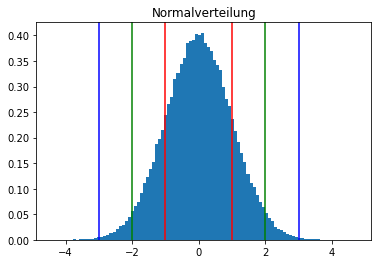

In [19]:
plt.hist(y_norm, bins = 100, density=True)
#fig, ax = plt.subplots()
  
plt.axvline(1, color ='red', lw = 2, alpha = 0.75)
plt.axvline(-1, color ='red', lw = 2, alpha = 0.75)
plt.axvline(2, color ='green', lw = 2, alpha = 0.75)
plt.axvline(-2, color ='green', lw = 2, alpha = 0.75)
plt.axvline(3, color ='blue', lw = 2, alpha = 0.75)
plt.axvline(-3, color ='blue', lw = 2, alpha = 0.75)
plt.title('Normalverteilung')
plt.show()

Nun, lassen Sie uns an der zweiten Aufgabe arbeiten: Überprüfen Sie die drei empirischen Regeln anhand des `students` Datensatzes. Dazu müssen wir überprüfen, ob eine der numerischen Variablen im Studentendatensatz  normalverteilt ist. Wir beginnen mit der Extraktion numerischer Variablen von Interesse aus dem `students` Datensatz. Dann zeichnen wir Histogramme und beurteilen, ob die Variable normalverteilt ist oder nicht. Zunächst überprüfen wir jedoch den Datensatz, indem wir die Funktion `head()` aufrufen.

In [20]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
df = pd.read_csv('students.csv', index_col=0)

# Lese die Einträge für age,nc.score,height, weight, score1, score2 und salary in Listen ein
age_df=df['age']
nc_score_df=df['nc.score']
height_df=df['height']
weight_df=df['weight']
score1_df=df['score1']
score2_df=df['score2']
salary_df=df['salary']
# Erzeuge neues Dataframe students_quant
students_quant_hist = pd.DataFrame(list(zip(age_df,nc_score_df,height_df,weight_df,score1_df,score2_df,salary_df)), columns = ['Age','Nc.Score','Height','Weight','Score1','Score2','Salary'])
students_quant_hist.head(5)

,Age,Nc.Score,Height,Weight,Score1,Score2,Salary
0,19,1.91,160,64.8,NaN,NaN,NaN
1,19,1.56,172,73.0,NaN,NaN,NaN
2,22,1.24,168,70.6,45.0,46.0,NaN
3,19,1.37,183,79.7,NaN,NaN,NaN
4,21,1.46,175,71.4,NaN,NaN,NaN


Um einen Überblick über die Form der Verteilung der einzelnen Variablen zu erhalten, verwenden wir die Funktion `hist()`.

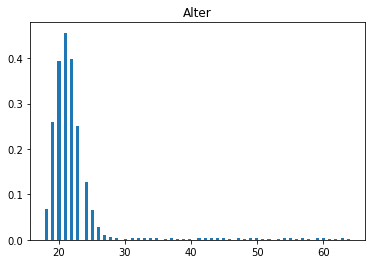

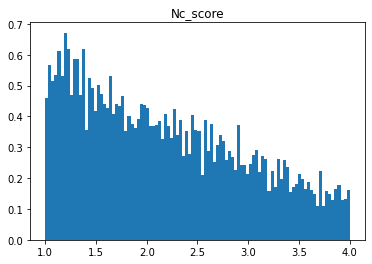

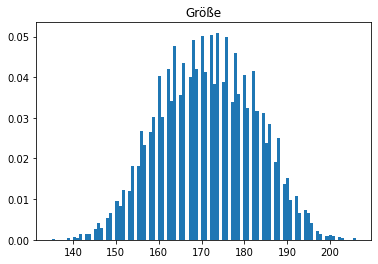

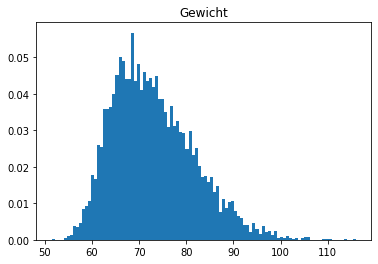

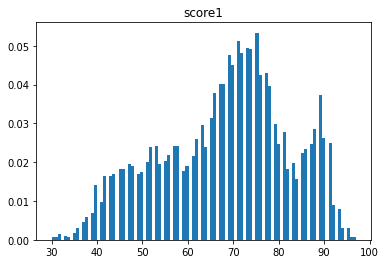

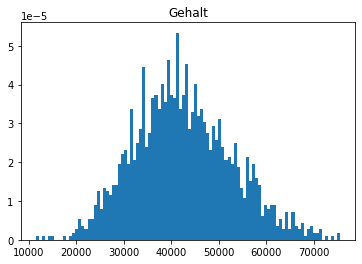

In [21]:
# Histogramm Alter
plt.hist(age_df, bins = 100, density=True)
plt.title('Alter')
plt.show()

# Histogramm Nc_score
plt.hist(nc_score_df, bins = 100, density=True)
plt.title('Nc_score')
plt.show()

# Histogramm Größe
plt.hist(height_df, bins = 100, density=True)
plt.title('Größe')
plt.show()

# Histogramm Gewicht
plt.hist(weight_df, bins = 100, density=True)
plt.title('Gewicht')
plt.show()

# Histogramm score1
plt.hist(score1_df, bins = 100, density=True)
plt.title('score1')
plt.show()

# Histogramm Gehalt
plt.hist(salary_df, bins = 100, density=True)
plt.title('Gehalt')
plt.show()



Wir stellen sofort fest, dass einige Variablen positiv verzerrt sind, also schließen wir sie aus und behalten diejenigen, die normal verteilt zu sein scheinen.

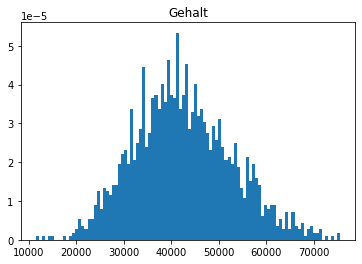

In [22]:
# Histogramm Gehalt
plt.hist(salary_df, bins = 100, density=True)
plt.title('Gehalt')
plt.show()

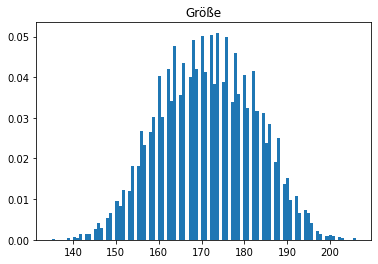

In [23]:
# Histogramm Größe
plt.hist(height_df, bins = 100, density=True)
plt.title('Größe')
plt.show()

Nun, sowohl die Variable `height` als auch die Variable `salary` scheinen mehr oder weniger normalverteilt zu sein. Es ist also eine Frage des Geschmacks, welche Variable man für die weitere Analyse auswählt. Für den Moment bleiben wir bei der Gehaltsvariable und überprüfen, ob die drei oben genannten empirischen Regeln gültig sind. Wir wechseln zu Python und validieren diese Regeln, indem wir zunächst den Mittelwert und die Standardabweichungen berechnen. Bitte beachten Sie, dass die Gehaltsvariable leere Zellen enthält, die mit `NA` gekennzeichnet sind. Daher schließen wir zunächst alle `NA`-Werte aus, indem wir die Funktion `dropna()` anwenden.

In [24]:
print(salary_df)

1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
            ...     
8235    36750.087135
8236             NaN
8237             NaN
8238    40112.041834
8239    45900.134459
Name: salary, Length: 8239, dtype: float64


In [25]:
salary_clean = salary_df.dropna()

In [26]:
print(salary_clean)

11      45254.108021
13      40552.790243
14      27007.030294
17      33969.159268
28      50617.641870
            ...     
8229    33259.703079
8234    41028.241341
8235    36750.087135
8238    40112.041834
8239    45900.134459
Name: salary, Length: 1753, dtype: float64


In [55]:
salary_clean_list = salary_clean.tolist()
salary_clean_list_std = np.std(salary_clean_list)
salary_clean_list_mean = np.mean(salary_clean_list)
print('Mittelwert des Gehalts :',np.mean(salary_clean_list))
print('1 Standardabweichung des Gehalts :',salary_clean_list_std)
print('2 Standardabweichung des Gehalts :',2*salary_clean_list_std)
print('3 Standardabweichung des Gehalts :',3*salary_clean_list_std)

Mittelwert des Gehalts : 42522.112364224806
1 Standardabweichung des Gehalts : 10330.192211889283
2 Standardabweichung des Gehalts : 20660.384423778567
3 Standardabweichung des Gehalts : 30990.57663566785


Wie in der obigen allgemeinen Beispielform zählen wir die Anzahl der Werte, die größer als $+1$ s.d. bzw. kleiner als $-1$ s.d. und $+2$ s.d. bzw. $-2$ s.d. und $+3$ s.d. bzw. $-3$ s.d. sind, und setzen sie in Beziehung zur Länge des Vektors, in unserem Fall $1753$.

In [60]:
# Initialisiere Variable lower, higher
lower = 0
higher = 0

# Konvertiere pandas obj in Liste
salary_clean_list = salary_clean.tolist()

# Sortiere y_norm aufsteigend
salary_clean_list.sort()

# Erzeuge for - Schleife um Zahlen im Bereich 1,2,3 Standardabweichungen um den Mittelwert abzuzählen

# 1te Standardabweichung

for i in range(len(salary_clean_list)) :
    if salary_clean_list[i] < salary_clean_list_mean-salary_clean_std :
        lower += 1
        
for i in range(len(salary_clean_list)) :
    if salary_clean_list[i] < salary_clean_list_mean+salary_clean_std :
        higher += 1

salary_exp_std = ((higher - lower)*100)/len(salary_clean_list)
print('1te Standardabweichung : ',salary_exp_std)

# 2te Standardabweichung

# Initialisiere Variable lower, higher
lower = 0
higher = 0

for i in range(len(salary_clean_list)) :
    if salary_clean_list[i] < salary_clean_list_mean-2*salary_clean_std :
        lower += 1
        
for i in range(len(salary_clean_list)) :
    if salary_clean_list[i] < salary_clean_list_mean+2*salary_clean_std :
        higher += 1

salary_exp_std2 = ((higher - lower)*100)/len(salary_clean_list)
print('2te Standardabweichung : ',salary_exp_std2)

# 3te Standardabweichung

# Initialisiere Variable lower, higher
lower = 0
higher = 0

for i in range(len(salary_clean_list)) :
    if salary_clean_list[i] < salary_clean_list_mean-3*salary_clean_std :
        lower += 1
        
for i in range(len(salary_clean_list)) :
    if salary_clean_list[i] < salary_clean_list_mean+3*salary_clean_std :
        higher += 1

salary_exp_std3 = ((higher - lower)*100)/len(salary_clean_list)
print('3te Standardabweichung : ',salary_exp_std3)

1te Standardabweichung :  67.08499714774672
2te Standardabweichung :  95.55048488305762
3te Standardabweichung :  99.7718197375927


Wow, ziemlich nah dran! Offensichtlich zeigt die Gehaltsvariable eine starke Tendenz zur Unterstützung der so genannten empirischen Regel. Wir stellen das Histogramm für die Variable `salary` dar, um unseren Eindruck zu bestätigen. Für einen besseren visuellen Eindruck färben wir die Standardabweichungen ein. Es gibt mehrere Möglichkeiten, eine bestimmte Farbe in Python auszuwählen In diesem Codebeispiel verwenden wir den Farbnamen "white" (geben Sie `colors()` in Ihre Konsole ein, um eine vollständige Liste der Farben zu sehen) und kombinieren ihn mit den Zahlen 2, 3, 4, einer Abkürzung für die Bewertung der Farben der Standardfarbpalette (geben Sie `palette()` in Ihre Konsole ein, um die Liste der Farben der Standardfarbpalette zu sehen).

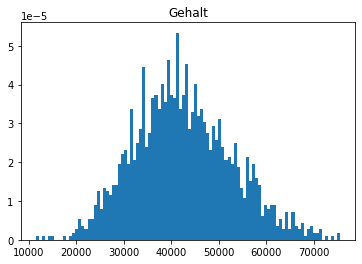

In [62]:
# Histogramm Gehalt
plt.hist(salary_clean_list, bins = 100, density=True)
plt.title('Gehalt')
plt.show()

Wir können nun unseren Visualisierungsansatz erweitern, indem wir die **empirische Dichteschätzung** mit der Funktion `density()` grafisch darstellen und ihre Form überprüfen. Wir stellen die empirische Dichteschätzung als gestrichelte Linie dar, indem wir das <a href="http://www.cookbook-r.com/Graphs/Shapes_and_line_types/">(Linientyp-Argument)</a> `lty = 2` und eine Linienbreite von 3 (Argument `lwd = 3`) setzen.

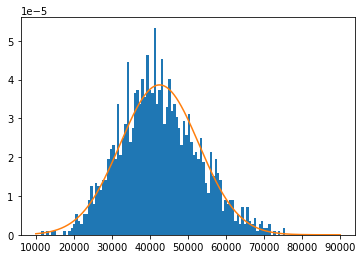

In [74]:
# Erzeuge Distribution
dist = norm(salary_clean_list_mean, salary_clean_list_std)

# Erzeuge Fit für salary_clean_list
values = [value for value in range(10000, 90000)]
probabilities = [dist.pdf(value) for value in values]

# Plotte das Histogramm und Pdf
pyplot.hist(salary_clean_list, bins=100, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

Schließlich vergleichen wir unsere **empirische Dichteschätzung** mit der theoretischen **Wahrscheinlichkeitsdichtefunktion**, die auf dem tatsächlichen Mittelwert und der Standardabweichung der Daten `salary` basiert. Für einen besseren visuellen Vergleich wechseln wir zurück zu einer nicht eingefärbten Histogramm-Darstellung.

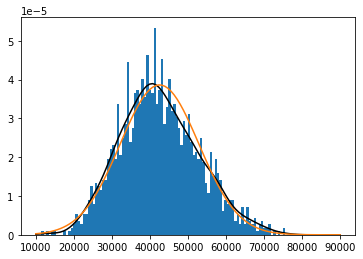

In [88]:
# Erzeuge Distribution
dist = norm(salary_clean_list_mean, salary_clean_list_std)

# Erzeuge Fit für salary_clean_list
scipy_kernel = gaussian_kde(salary_clean_list)
v = scipy_kernel.evaluate(x_salary)

# Erzeuge Normalverteilung
x_salary = np.linspace(10000,90000,100)
pdf_result = stats.norm.pdf(x_salary,loc=salary_clean_list_mean,scale=salary_clean_std)

#plt.plot(x_salary,pdf_result)

# Plotte das Histogramm, Normalverteilung und Pdf
plt.hist(salary_clean_list, bins=100, density=True)
plt.plot(x_salary,v,'k')
plt.plot(x_salary,pdf_result)
plt.show()

Wir können daraus schließen, dass `salary` im Datensatz der `students` ungefähr normalverteilt ist. Die Grafik zeigt jedoch, dass die Verteilung der Gehaltsvariablen leicht nach links geneigt ist. Dies ist an der geringen Abweichung zwischen der **empirischen Dichteschätzung** und der **Wahrscheinlichkeitsdichtefunktion** zu erkennen.